# Performance measurements of Logistic regression & Random Forest

In [45]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n
import warnings
warnings.filterwarnings("ignore")    

In [46]:
df=p.read_excel("AirQuality.xlsx")

In [47]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Country','State','city','place','lastupdate','Avg','Max','Min','Pollutants']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(str)

In [48]:
df['AQI'] = df.Avg.map({ '68':'satisfactor', '74':'satisfactor', '71':'satisfactor', '4':'good', '39':'good', '42':'good', '27':'good', '263':'poor', '250':'poor', '249':'poor','258':'poor', '284':'poor', '28':'good', '106':'satisfactor', '44':'good', '62':'satisfactor', '59':'satisfactor', '1':'good', '9':'good', '15':'good', '34':'good','63':'satisfactor', '14':'good', '13':'good', '69':'satisfactor', '37':'good', '2':'good', '5':'good', '66':'satisfactor', '202':'poor', '11':'good', '10':'good','52':'satisfactor', '54':'satisfactor', '246':'poor', '248':'poor', '32':'good', '93':'satisfactor', '226':'poor', '189':'moderate', '124':'moderate', '272':'poor','277':'poor', '278':'poor', '279':'poor', '280':'poor', '87':'satisfactor', '19':'good', '240':'poor', '197':'moderate', '38':'good', '84':'satisfactor','61':'satisfactor', '196':'moderate', '171':'moderate', '23' :'good', '111':'moderate', '43' :'good', '188':'moderate', '203' :'poor' , '16' :'good', '20' :'good','225' :'poor' , '190':'moderate', '26' :'good', '104':'moderate', '25' :'good', '224' :'poor' , '210' :'poor' , '83':'satisfactor', '82':'satisfactor', '233' :'poor' ,'205' :'poor' , '78':'satisfactor', '70':'satisfactor', '211' :'poor' , '179':'moderate', '91':'satisfactor', '49':'good', '134':'moderate', '161':'moderate', '223' :'poor' ,'57':'satisfactor', '73':'satisfactor', '207' :'poor' , '184':'moderate', '48' :'good', '6' :'good', '7' :'good', '194':'moderate', '21' :'good', '50' :'good', '231' :'poor' ,'175':'moderate', '45' :'good', '86':'satisfactor', '243' :'poor' , '232' :'poor' , '18' :'good', '31' :'good', '95':'satisfactor', '237' :'poor' , '217' :'poor' ,'99':'satisfactor', '33' :'good', '176':'moderate', '22' :'good', '29' :'good', '107':'moderate', '17' :'good', '75':'satisfactor', '220' :'poor' , '165':'moderate','149':'moderate', '3' :'good', '245' :'poor' , '239' :'poor' , '72':'satisfactor', '77':'satisfactor', '208' :'poor' , '24' :'good', '198':'moderate', '153':'moderate','53':'satisfactor', '228' :'poor' , '186':'moderate', '51':'satisfactor', '247' :'poor' , '219' :'poor' , '100':'satisfactor', '36' :'good', '204' :'poor' , '30' :'good','221' :'poor' , '229' :'poor' , '187':'moderate', '56':'satisfactor', '230' :'poor' , '192':'moderate', '114':'moderate', '274' :'poor' , '236' :'poor' ,'222' :'poor' , '206' :'poor' , '174':'moderate', '58':'satisfactor', '235' :'poor' , '212' :'poor' , '120':'moderate', '148':'moderate', '242' :'poor' ,'215' :'poor' , '80':'satisfactor', '79':'satisfactor', '67':'satisfactor', '40' :'good', '35' :'good', '185':'moderate', '101':'moderate', '46' :'good', '209' :'poor' ,'169':'moderate', '12' :'good', '47' :'good', '227' :'poor' , '200' :'moderate' , '244' :'poor' , '238' :'poor' , '160':'moderate', '282' :'poor' , '218' :'poor' ,'261' :'poor' , '262' :'poor' , '260' :'poor' , '256' :'poor' , '252' :'poor' , '162':'moderate', '172':'moderate', '156':'moderate', '133':'moderate','116':'moderate', '193':'moderate', '123':'moderate', '65':'satisfactor', '96':'satisfactor', '173':'moderate', '103':'moderate', '8' :'good', '273' :'poor' , '275' :'poor' ,'283' :'poor' , '276' :'poor' , '254' :'poor' , '152':'moderate', '105':'moderate', '64':'satisfactor', '0' :'good', '76':'satisfactor', '127':'moderate', '97':'satisfactor','115':'moderate', '150':'moderate', '142':'moderate', '41' :'good', '102':'moderate', '90':'satisfactor', '132':'moderate', '98':'satisfactor', '199':'moderate', '191':'moderate','157':'moderate', '139':'moderate', '94':'satisfactor', '110':'moderate', '270' :'poor' , '268' :'poor' , '281' :'poor' , '265' :'poor' , '267' :'poor' ,'269' :'poor' , '81':'satisfactor', '128':'moderate', '146':'moderate', '145':'moderate', '129':'moderate', '85':'satisfactor', '117':'moderate', '108':'moderate', '154':'moderate','131':'moderate', '255' :'poor' , '257' :'poor' , '88':'satisfactor', '113':'moderate', '118':'moderate', '167':'moderate', '164':'moderate', '137':'moderate','135':'moderate', '138':'moderate', '109':'moderate', '60':'satisfactor', '177':'moderate', '271' :'poor' , '170':'moderate', '144':'moderate', '166':'moderate','155':'moderate', '136':'moderate', '151':'moderate', '89':'satisfactor', '119':'moderate', '266' :'poor' , '264' :'poor' , '251' :'poor' , '253' :'poor' ,'259' :'poor' , '163':'moderate', '159':'moderate', '241' :'poor' , '214' :'poor' , '122':'moderate', '234' :'poor' , '195':'moderate', '130':'moderate','216' :'poor' , '213' :'poor' , '121':'moderate', '112':'moderate', '168':'moderate', '201' :'poor' , '141':'moderate', '181':'moderate', '143':'moderate','126':'moderate', '182':'moderate', '178':'moderate', '158':'moderate', '140':'moderate', '183':'moderate', '92':'satisfactor', '180':'moderate', '147':'moderate', '55':'satisfactor','125':'moderate'})

In [49]:
df['class'] = df.AQI.map({'good':1,'moderate':0, 'severe':0, 'verypoor':0, 'satisfactor':1,'poor':0})

In [50]:
del df['AQI']

In [51]:
df.head()

,Country,State,city,place,lastupdate,Avg,Max,Min,Pollutants,class
0,0,0,4,101,0,68,105,41,5,1
1,0,0,4,101,0,74,99,42,4,1
2,0,0,4,101,0,71,115,45,2,1
3,0,0,4,101,0,4,5,3,1,1
4,0,0,4,101,0,39,106,1,6,1


In [52]:
df.columns

Index(['Country', 'State', 'city', 'place', 'lastupdate', 'Avg', 'Max', 'Min',
       'Pollutants', 'class'],
      dtype='object')

In [53]:
#According to the cross-validated MCC scores, the random forest is the best-performing model, so now let's evaluate its performance on the test set.
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef, cohen_kappa_score, accuracy_score, average_precision_score, roc_auc_score

In [54]:
X = df.drop(labels='class', axis=1)
y = df.loc[:,'class']    

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
logR= LogisticRegression()
logR.fit(X_train,y_train)
predictLR = logR.predict(X_test
print("")
print('Classification report of Logistic Regression Results:')
print("")
print(classification_report(y_test,predictLR))
print("")
cm2=confusion_matrix(y_test,predictLR)
print('Confusion Matrix result of Logistic Regression is:\n',cm2)
print("")
sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity2 )
print("")
specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity2)
print("")
accuracy = cross_val_score(logR, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
print("")
print("Accuracy result of Logistic Regression is:",accuracy.mean() * 100)
LR=accuracy.mean() * 100
def graph():
    import matplotlib.pyplot as plt
    data=[LR]
    alg="Logistic Regression"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("orange"))
    plt.title("Accuracy comparison of Air Pollution",fontsize=15)
    plt.legend(b,data,fontsize=9)
graph()

SyntaxError: '(' was never closed (156516354.py, line 6)

Confusion matrix-logR:
[[ 72   1]
 [  1 174]]


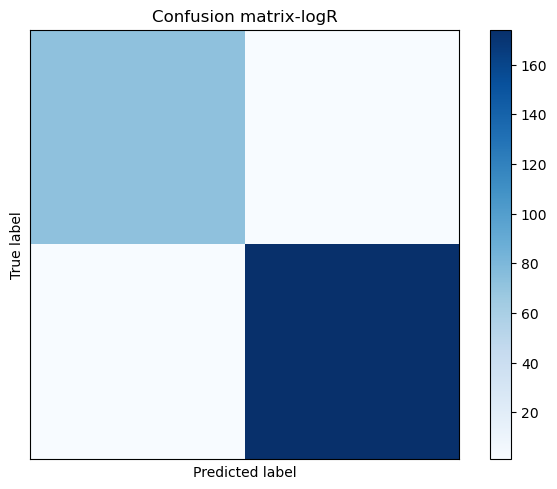

In [57]:
def plot_confusion_matrix(cm2, title='Confusion matrix-logR', cmap=plt.cm.Blues):
    target_names=[]
    plt.imshow(cm2, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm2=confusion_matrix(y_test, predictLR)
print('Confusion matrix-logR:')
print(cm2)
plot_confusion_matrix(cm2)

In [58]:
TN = cm2[1][0]
FN = cm2[0][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 174
True Negative : 1
False Positive : 1
False Negative : 72

True Positive Rate : 0.7073170731707317
True Negative Rate : 0.5
False Positive Rate : 0.5
False Negative Rate : 0.2926829268292683

Positive Predictive Value : 0.9942857142857143
Negative predictive value : 0.0136986301369863



Classification report of Random Forest Results:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        73
           1       0.99      0.99      0.99       175

    accuracy                           0.99       248
   macro avg       0.99      0.99      0.99       248
weighted avg       0.99      0.99      0.99       248

Cross validation test results of accuracy:
[1.         1.         1.         1.         1.         1.
 1.         1.         0.91666667 1.         1.         1.
 1.         1.         1.         1.         0.91666667 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.91666667 1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.91666667 1.         1.         1.         1.
 0.91666667 1.         1.         1.         1.         1.
 0.91666667 1.         1.         0.91666667 1.         1.
 1.         1.         1.         1.         1.  

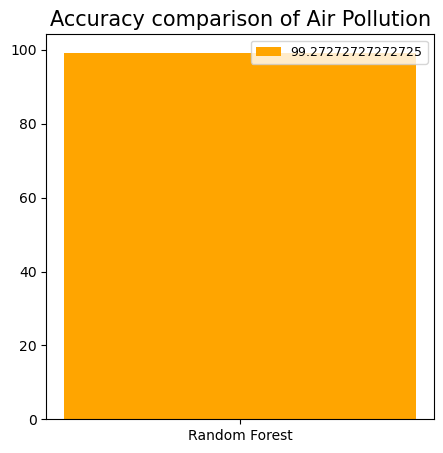

In [59]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
predictR = rfc.predict(X_test)
print("")
print('Classification report of Random Forest Results:')
print("")
print(classification_report(y_test,predictR))
accuracy = cross_val_score(rfc, X, y, cv=70)
print('Cross validation test results of accuracy:')
print(accuracy)
print("")
print("")
print("Accuracy result of Random Forest is:",accuracy.mean() * 100)
print("")
cm1=confusion_matrix(y_test,predictR)
print('Confusion Matrix result of Random Forest is:\n',cm1)
print("")
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
print("")
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)
print("")
accuracy = cross_val_score(rfc, X, y, scoring='accuracy')
print('Cross validation test results of accuracy:')
print(accuracy)
print("")
print("Accuracy result of Random Forest is:",accuracy.mean() * 100)
rfc=accuracy.mean() * 100
def graph():
    import matplotlib.pyplot as plt
    data=[rfc]
    alg="Random Forest"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("orange"))
    plt.title("Accuracy comparison of Air Pollution",fontsize=15)
    plt.legend(b,data,fontsize=9)   
graph()

Confusion matrix-rfc:
[[ 72   1]
 [  1 174]]


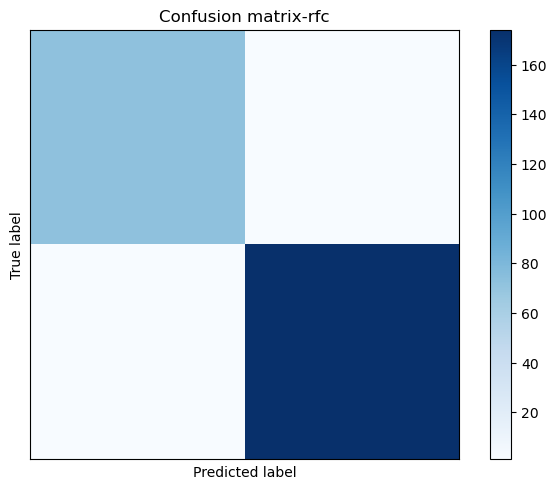

In [60]:
def plot_confusion_matrix(cm2, title='Confusion matrix-rfc', cmap=plt.cm.Blues):
    target_names=[]
    plt.imshow(cm2, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = n.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cm2=confusion_matrix(y_test, predictR)
print('Confusion matrix-rfc:')
print(cm2)
plot_confusion_matrix(cm2)

In [61]:
TN = cm2[1][0]
FN = cm2[0][0]
TP = cm2[1][1]
FP = cm2[0][1]
print("True Positive :",TP)
print("True Negative :",TN)
print("False Positive :",FP)
print("False Negative :",FN)
print("")
TPR = TP/(TP+FN)
TNR = TN/(TN+FP)
FPR = FP/(FP+TN)
FNR = FN/(TP+FN)
print("True Positive Rate :",TPR)
print("True Negative Rate :",TNR)
print("False Positive Rate :",FPR)
print("False Negative Rate :",FNR)
print("")
PPV = TP/(TP+FP)
NPV = TN/(TN+FN)
print("Positive Predictive Value :",PPV)
print("Negative predictive value :",NPV)

True Positive : 174
True Negative : 1
False Positive : 1
False Negative : 72

True Positive Rate : 0.7073170731707317
True Negative Rate : 0.5
False Positive Rate : 0.5
False Negative Rate : 0.2926829268292683

Positive Predictive Value : 0.9942857142857143
Negative predictive value : 0.0136986301369863
